In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy.fftpack import fft
import time
%matplotlib inline

In [2]:
# # OU
# Tot=300
# dt=0.01
# T=np.arange(dt,Tot,dt)
# tau=1
# D = 4
# L=np.zeros(len(T))
# mu, sigma = 0, 1
# for i in range(len(T)-1):
#     L[i+1]=L[i]*(1-dt/tau)+math.sqrt(D*dt)*np.random.normal(mu,sigma)

In [3]:
Tot=300
dt=0.01
T=np.arange(dt,Tot,dt)
mu, sigma = 0, 1
L=np.random.normal(mu,sigma,len(T))
L[0]=0

In [4]:
# filtering
fc=[7,4,2,1]
x_set=[L]
for ifc in range(len(fc)):
    b, a = signal.butter(2, 2*fc[ifc]*dt, btype='low', analog=False)
    Lf = signal.filtfilt(b, a, L)
    x_set.append(Lf)

(150.0, 160.0)

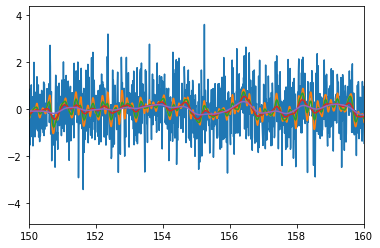

In [5]:
for i in range(np.size(x_set,0)):
    plt.plot(T,x_set[i])
plt.xlim(150,160)

(-14.989000000000003, 314.98900000000003)

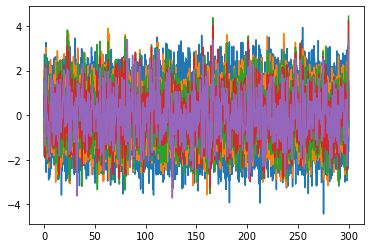

In [6]:
# some scale
for i in range(np.size(x_set,0)):
    x_set[i]=x_set[i]/np.std(x_set[i])
for i in range(np.size(x_set,0)):
    plt.plot(T,x_set[i])
plt.xlim()

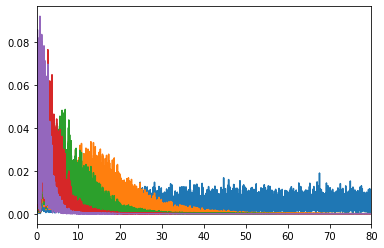

In [7]:
#FFT
for nset in range(np.size(x_set,0)):
    Ts=dt
    xft=fft(x_set[nset])
    xftreal = xft.real  
    xftimg = xft.imag
    xft_abs=abs(xft)
    xft_nor=xft_abs/len(xft_abs)
    xft_nor2=xft_nor[range(int(len(xft_nor)/2))]
    
    f = np.arange(len(xft))
    f2 = f[range(int(len(xft)/2))]
    f2=f2*Ts
    plt.plot(f2,xft_nor2)
    plt.xlim(0,80)

In [8]:
y_set=[]
z_set=[]
for i in range(np.size(x_set,0)):
    x=x_set[i]
#     alpha = 60.
#     beta =  2
#     K = 30.
#     g = 30.
    alpha = 19.9
    beta =  0.62
    K = 10
    g = 30
    y=np.zeros(len(T))
    z=np.zeros(len(T))
    for j in range(len(T)-1):
        dy=dt*(-alpha*y[j]+K*(x[j]-z[j]))
        dz=dt*(-beta*z[j]+g*y[j])
        y[j+1]=y[j]+dy
        z[j+1]=z[j]+dz
    y_set.append(y)
    z_set.append(z)

In [9]:
# same scale
for i in range(np.size(x_set,0)):
    x_set[i]=x_set[i]/np.std(x_set[i])
    y_set[i]=y_set[i]/np.std(y_set[i])
    z_set[i]=z_set[i]/np.std(z_set[i])

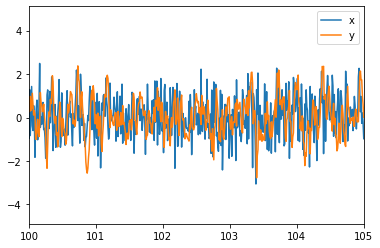

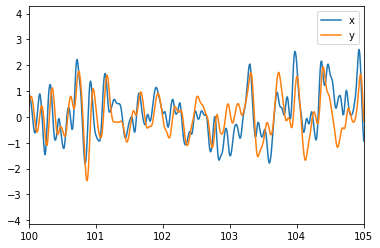

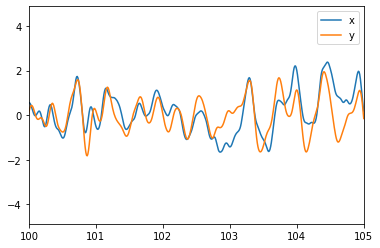

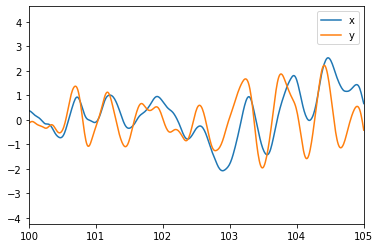

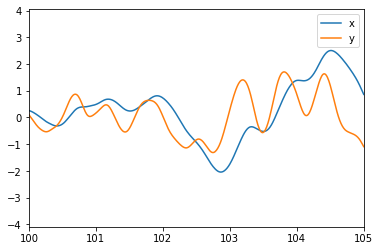

In [10]:
for i in range(np.size(x_set,0)):
    plt.plot(T,x_set[i])
    plt.plot(T,y_set[i])
#     plt.plot(T,z_set[i])
    plt.xlim(100,105)
    plt.legend(('x','y'))
    plt.show()

In [11]:
# assign data to different state
# state number should be even
nx=8
ny=8

xstate_set=[]
ystate_set=[]
for nset in range(np.size(x_set,0)):
# states of input
    xs=x_set[nset]
    xs=np.sort(xs)
    xstatestep=len(xs)/nx
    xinterval=[0]
    for i in range(int(nx/2-1)):
        xinterval=np.append(xinterval,xs[round(len(xs)/2)+(i+1)*round(xstatestep)])
    xinterval=np.append(xinterval,float('inf'))
    for j in range(int(nx/2-1)):
        xinterval=np.append(xs[round(len(xs)/2)-(j+1)*round(xstatestep)],xinterval)
    xinterval=np.append(float('-inf'),xinterval)
    print(xinterval)
    xstate=np.zeros(len(x_set[nset]))
    for i in range(len(x_set[nset])):
        tempinterval=[]
        state=[]
        tempinterval=np.array(xinterval)
        tempinterval=np.append(tempinterval,x_set[nset][i])
        tempinterval=np.sort(tempinterval)
        state=np.where(tempinterval==x_set[nset][i])
        xstate[i]=state[0][0]
    xstate = xstate.astype(int)

    # states of output
    ys=np.sort(y_set[nset])
    ystatestep=len(ys)/ny
    yinterval=[0]
    for i in range(int(ny/2-1)):
        yinterval=np.append(yinterval,ys[round(len(ys)/2)+(i+1)*round(ystatestep)])
    yinterval=np.append(yinterval,float('inf'))
    for j in range(int(ny/2-1)):
        yinterval=np.append(ys[round(len(ys)/2)-(j+1)*round(ystatestep)],yinterval)
    yinterval=np.append(float('-inf'),yinterval)
    print(yinterval)
    ystate=np.zeros(len(y_set[nset]))
    for i in range(len(y_set[nset])):
        tempinterval=[]
        state=[]
        tempinterval=np.array(yinterval)
        tempinterval=np.append(tempinterval,y_set[nset][i])
        tempinterval=np.sort(tempinterval)
        state=np.where(tempinterval==y_set[nset][i])
        ystate[i]=state[0][0]
    ystate = ystate.astype(int)
    
    xstate_set.append(xstate)
    ystate_set.append(ystate)

    


[       -inf -1.15586622 -0.68017123 -0.3261318   0.          0.31299152
  0.67463424  1.15906718         inf]
[       -inf -1.15369184 -0.67216033 -0.31876953  0.          0.31700017
  0.67887286  1.14635669         inf]
[       -inf -1.14982495 -0.67815808 -0.32524503  0.          0.3108465
  0.65787163  1.13480944         inf]
[       -inf -1.15647217 -0.66977287 -0.32629768  0.          0.32131844
  0.67418067  1.13661095         inf]
[       -inf -1.14327167 -0.66973341 -0.31838741  0.          0.30098538
  0.64312665  1.12827961         inf]
[       -inf -1.15233388 -0.66320359 -0.31203526  0.          0.31289941
  0.6624938   1.13422023         inf]
[       -inf -1.15175291 -0.67659543 -0.33367273  0.          0.29298694
  0.64365022  1.13395079         inf]
[       -inf -1.12933799 -0.65713459 -0.30142893  0.          0.31200334
  0.64277876  1.1340853          inf]
[       -inf -1.13487337 -0.69661804 -0.35745575  0.          0.28022117
  0.63755615  1.16144786         inf]
[ 

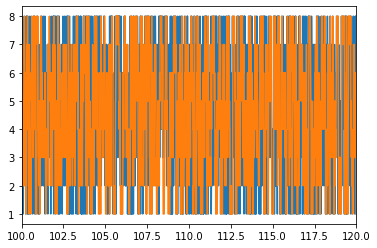

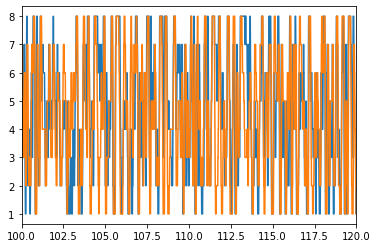

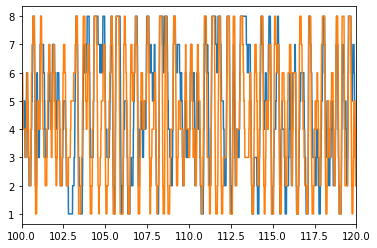

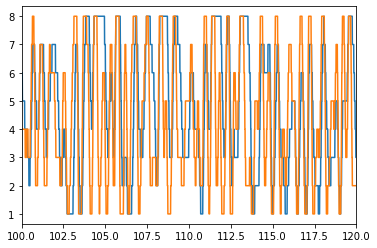

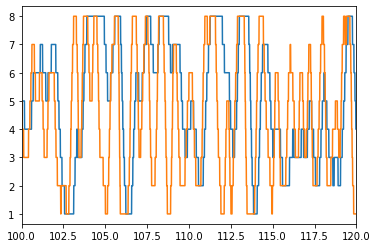

In [12]:
for i in range(np.size(x_set,0)):
    plt.plot(T,xstate_set[i])
    plt.plot(T,ystate_set[i])
    plt.xlim(100,120)
    plt.show()

In [13]:
MI_set=[]
for k in range(np.size(x_set,0)):
    xstate=x_set[k]
    ystate=y_set[k]
    
    negshift=-1 # second
    posshift=1 # second
    shiftdu=dt # second
    shiftlen=(posshift-negshift)/dt+1
    timeshift=np.linspace(negshift,posshift,int(shiftlen))
    bitshift=np.linspace(negshift/dt,posshift/dt,int(shiftlen))
    xedges=[]
    yedges=[]
    xs=np.sort(xstate)
    ys=np.sort(ystate)
    for ii in range(nx):
        ind=int((ii)*len(xstate)/nx)
        xedges.append(xs[ind])
        yedges.append(ys[ind])
    xedges.append(xs[-1])
    yedges.append(ys[-1])

    # shifted data
    # shift>0 => y shifted to positive side
    MI=np.zeros(len(bitshift))
    for i in range(len(bitshift)):
        xx=[]
        yy=[]
        shift=int(bitshift[i])
        if shift>0:
            xx=xstate[shift:]
            yy=ystate[:-shift]
        elif shift==0:
            xx=xstate
            yy=ystate
        elif shift<0:
            xx=xstate[:shift]
            yy=ystate[-shift:]

        H, xedges, yedges = np.histogram2d(xx, yy, bins=(xedges, yedges))
        statesum=np.sum(H)
        px_list=np.sum(H,axis=1)/statesum
        py_list=np.sum(H,axis=0)/statesum
        pxy_list=H/statesum

        px=px_list[xstate_set[k]-int(1)]
        py=py_list[ystate_set[k]-int(1)]
        pxy=np.zeros(len(xstate_set[k]))
        xindices=xstate_set[k]-int(1)
        yindices=ystate_set[k]-int(1)
        for ixiy in range(len(xstate_set[k])):
            pxy[ixiy]=pxy_list[xindices[ixiy]][yindices[ixiy]]
        MIsingle=pxy*np.log2(pxy/px/py)
        MIsingle=MIsingle[~np.isnan(MIsingle)]
        MI[i]=np.sum(MIsingle)
#         MIsingle=np.zeros(len(xx))
#         for j in range(len(xx)):
#             if pxy[j]==0:
#                 MIsingle[j]=0
#             else:
#                 MIsingle[j]=pxy[j]*math.log2(pxy[j]/px[j]/py[j])
#         MI[i]=np.sum(MIsingle)
        
    MI_set.append(MI)
    

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log2
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in multiply


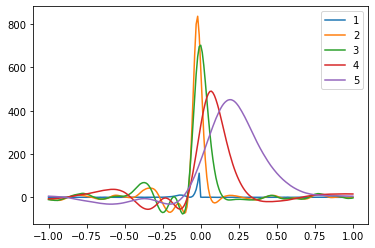

In [14]:
for i in range(np.size(x_set,0)):
    plt.plot(timeshift,MI_set[i])
    plt.xlim()
    plt.legend(('1','2','3','4','5'))